## *_i.py 파일 합친 버전 구현 랭그래프

SelfRAGState 클래스 정의 완료!
✅ 환경 설정 완료 (*_i.py를 합친 버전)
✅ Medical RAG 워크플로우 (*_i.py 버전) 생성 완료!


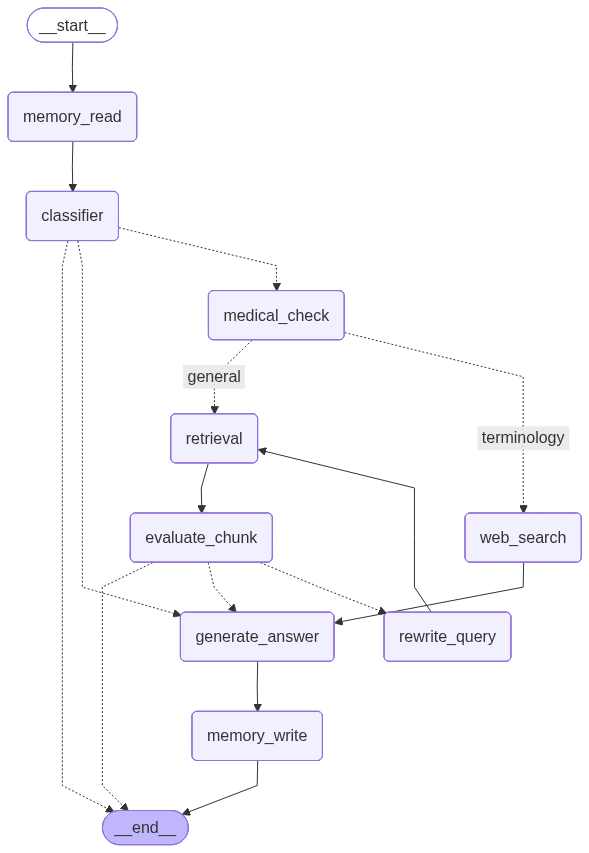

✅ 워크플로우 그래프 표시 완료


In [2]:
import os
import sys
from dotenv import load_dotenv
import importlib
from IPython.display import Image, display

# 환경 변수 로드
load_dotenv()

# 프로젝트 루트 디렉토리를 Python 경로에 추가
project_root = os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd())))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# 개발 중 수정사항 반영을 위한 모듈 리로드 (*_i.py 버전)
modules_to_reload = [
    'graph.state',  # 새로운 State 정의
    'graph.nodes.classifier',  # conversation_type 기반 분류
    'graph.nodes.memory',  # List[Dict] 형식 conversation_history
    'graph.nodes.generate_answer',  # conversation_type 기반 답변 생성
    'graph.nodes.medical_check',
    'graph.nodes.retrieval',
    'graph.nodes.rewrite_query',
    'graph.nodes.web_search',
    'graph.nodes.evaluate_chunk',
    'graph.compile',  # conversation_type 기반 라우팅
    'rag.services.retriever'
]
for module_name in modules_to_reload:
    if module_name in sys.modules:
        importlib.reload(sys.modules[module_name])

print("✅ 환경 설정 완료 (*_i.py를 합친 버전)")

# 워크플로우 생성
from graph.compile import create_medical_rag_workflow
medical_app_i = create_medical_rag_workflow()
print("✅ Medical RAG 워크플로우 (*_i.py 버전) 생성 완료!")

# 워크플로우 그래프 시각화
try:
    display(Image(medical_app_i.get_graph().draw_mermaid_png()))
    print("✅ 워크플로우 그래프 표시 완료")
except Exception as e:
    print(f"❌ 그래프 표시 오류: {e}")